In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io  # If loading from string, but we'll assume saving to file

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# If you have the data as a string (from the document), you can load it like this:
# data_string = """Paste the entire CSV content here"""
# df = pd.read_csv(io.StringIO(data_string))

# But since it's large and truncated in the prompt, assume you've copied the CSV content to a file named 'nfhs_data.csv'
# Save the content from <DOCUMENT> to 'nfhs_data.csv' manually before running.
df = pd.read_csv('nfhs_data.csv')

# Display the first few rows to verify loading
df.head()

States/UTs   Area  Number of Households surveyed  \
0                      India  Urban                         160138   
1                      India  Rural                         476561   
2                      India  Total                         636699   
3  Andaman & Nicobar Islands  Urban                            527   
4  Andaman & Nicobar Islands  Rural                           2097   

   Number of Women age 15-49 years interviewed  \
0                                       179535   
1                                       544580   
2                                       724115   
3                                          557   
4                                         1840   

   Number of Men age 15-54 years interviewed  \
0                                      26420   
1                                      75419   
2                                     101839   
3                                         85   
4                                        282   

  Female population age 6 years and above who ever attended school (%)  \
0                                              82.5                      
1                                              66.8                      
2                                              71.8                      
3                                              86.5                      
4                                              81.8                      

   Population below age 15 years (%)  \
0                               23.1   
1                               28.1   
2                               26.5   
3                               22.7   
4                               19.7   

    Sex ratio of the total population (females per 1,000 males)  \
0                                              985.0              
1                                             1037.0              
2                                             1020.0              
3                                             1023.0              
4                                              929.0              

  Sex ratio at birth for children born in the last five years (females per 1,000 males)  \
0                                               924                                       
1                                               931                                       
2                                               929                                       
3                                               941                                       
4                                               891                                       

  Children under age 5 years whose birth was registered with the civil authority (%)  \
0                                              93.3                                    
1                                              87.5                                    
2                                              89.1                                    
3                                              96.9                                    
4                                              97.8                                    

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

  Women (age 15-49 years) having a bank or savings account that they themselves use (%)  \
0                                              80.9                                       
1                                              77.4                                       
2                                              78.6                                       
3                                              88.5                                       
4                                              89.8                                       

   Women (age 15-49 years) having a mobile phone that they themselves use (%)  \
0                                              69.4                             
1                                              46.6                     

In [2]:
# Cell 2: Basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nColumn Names:\n", df.columns.tolist())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

#If duplicates exist, remove them (uncomment if needed)
df = df.drop_duplicates()

Dataset Shape: (111, 136)

Data Types:
 States/UTs                                                                   object
Area                                                                         object
Number of Households surveyed                                                 int64
Number of Women age 15-49 years interviewed                                   int64
Number of Men age 15-54 years interviewed                                     int64
                                                                              ...  
Young women age 18-29 years who experienced sexual violence by age 18 (%)    object
Women age 15 years and above who use any kind of tobacco (%)                 object
Men age 15 years and above who use any kind of tobacco (%)                   object
Women age 15 years and above who consume alcohol (%)                         object
Men age 15 years and above who consume alcohol (%)                           object
Length: 136, dtype: object

Column N

In [3]:
# Cell 3: Identify missing values, noise, and special characters
# In NFHS data, '*' often means missing/insufficient data, '(' ')' indicate small sample estimates

# First, count NaN values
missing_values = df.isnull().sum()
print("Missing Values (NaN) per Column:\n", missing_values[missing_values > 0])

# Check for non-numeric in numeric columns (noise like '*', '(', ')')
numeric_cols = df.select_dtypes(include=['object']).columns  # Columns that should be numeric but are object due to noise

for col in df.columns[2:]:  # Skip States/UTs and Area
    # Replace common NFHS notations: '*' to NaN, remove '(' and ')' and convert to float
    df[col] = df[col].astype(str).str.replace(r'\(|\)', '', regex=True).str.strip()
    df[col] = df[col].replace(['*', '', ' '], np.nan)
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        pass

# Recheck missing after cleaning
missing_after_clean = df.isnull().sum()
print("\nMissing Values After Cleaning:\n", missing_after_clean[missing_after_clean > 0])

# Summary statistics to spot potential outliers/noise
df.describe()

Missing Values (NaN) per Column:
 Series([], dtype: int64)

Missing Values After Cleaning:
 Sex ratio at birth for children born in the last five years (females per 1,000 males)                 1
Children under age 5 years whose birth was registered with the civil authority (%)                    1
Deaths in the last 3 years registered with the civil authority (%)                                    2
Households using clean fuel for cooking3 (%)                                                          1
Households using iodized salt (%)                                                                     1
                                                                                                     ..
Women (age 15-49 years) having a mobile phone that they themselves use (%)                            1
Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%)      1
Ever-married women age 18-49 years who have ever experienced spousal violenc

Number of Households surveyed  \
count                     111.000000   
mean                    22944.108108   
std                     75735.480903   
min                        21.000000   
25%                      2868.000000   
50%                      8154.000000   
75%                     18693.000000   
max                    636699.000000   

       Number of Women age 15-49 years interviewed  \
count                                   111.000000   
mean                                  26094.234234   
std                                   86416.523763   
min                                      26.000000   
25%                                    2844.500000   
50%                                    9133.000000   
75%                                   21632.000000   
max                                  724115.000000   

       Number of Men age 15-54 years interviewed  \
count                                 111.000000   
mean                                 3669.873874   
std                                 12096.478062   
min                                     0.000000   
25%                                   430.000000   
50%                                  1308.000000   
75%                                  3147.500000   
max                                101839.000000   

       Female population age 6 years and above who ever attended school (%)  \
count                                         111.000000                      
mean                                           78.084685                      
std                                             9.912391                      
min                                            52.400000                      
25%                                            69.850000                      
50%                                            79.300000                      
75%                                            84.900000                      
max                                            97.600000                      

       Population below age 15 years (%)  \
count                         111.000000   
mean                           24.666667   
std                             4.096414   
min                            18.100000   
25%                            22.000000   
50%                            23.900000   
75%                            26.350000   
max                            39.200000   

        Sex ratio of the total population (females per 1,000 males)  \
count                                         111.000000              
mean                                         1008.658559              
std                                            71.730067              
min                                           775.000000              
25%                                           964.500000              
50%                                          1015.000000              
75%                                          1049.500000              
max                                          1193.000000              

       Sex ratio at birth for children born in the last five years (females per 1,000 males)  \
count                                         110.000000                                       
mean                                          943.460000                                       
std                                           102.281366                                       
min                                           705.000000                                       
25%                                           894.000000                                       
50%                                           935.300000                                       
75%                                           969.000000                                       
max                                          1520.000000                                       

       Children under age 5 years whose birth was registered with the civil 

Outliers in Infant Mortality Rate:
      States/UTs   Area  Infant mortality rate (per 1000 live births)
56  Lakshadweep  Total                                           0.0


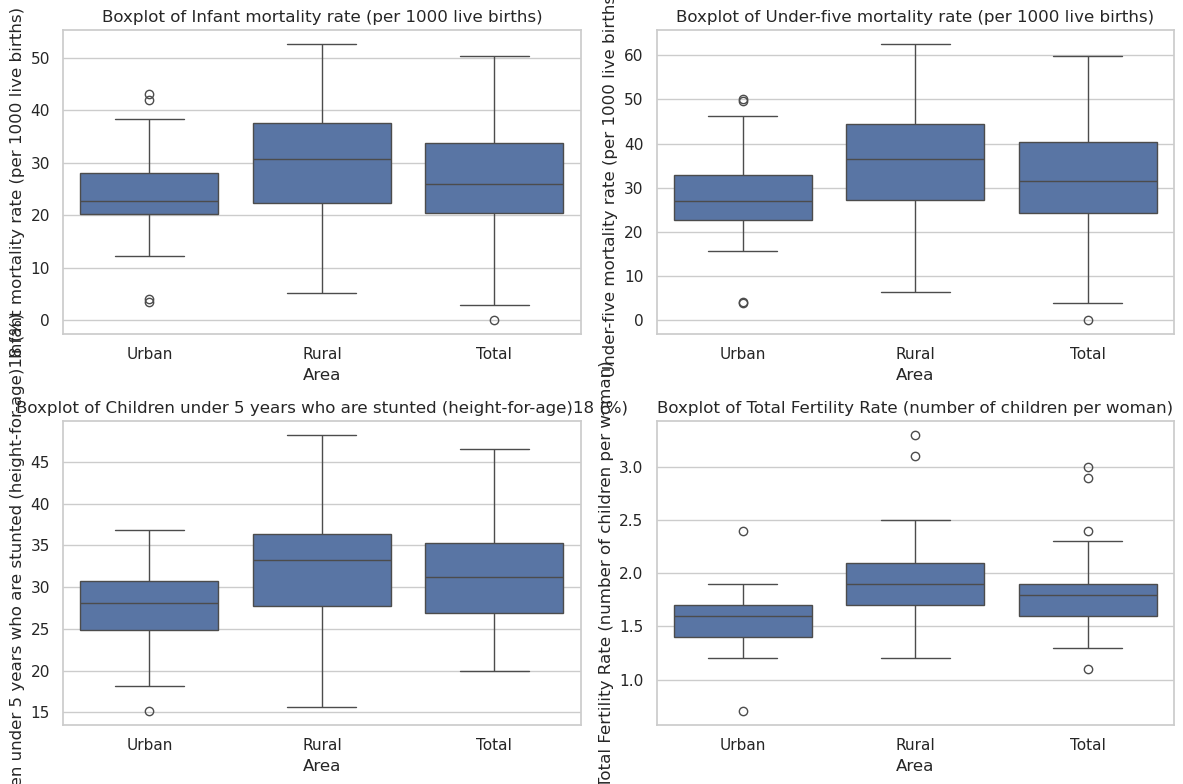

In [4]:
# Cell 4: Handle outliers
# For example, using IQR method on numeric columns

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Example: Check outliers in 'Infant mortality rate (per 1000 live births)'
outliers_imr = detect_outliers_iqr(df, 'Infant mortality rate (per 1000 live births)')
print("Outliers in Infant Mortality Rate:\n", outliers_imr[['States/UTs', 'Area', 'Infant mortality rate (per 1000 live births)']])

# Visualize boxplot for outliers (example for a few key columns)
key_cols = ['Infant mortality rate (per 1000 live births)', 'Under-five mortality rate (per 1000 live births)', 
            'Children under 5 years who are stunted (height-for-age)18 (%)', 'Total Fertility Rate (number of children per woman)']

plt.figure(figsize=(12, 8))
for i, col in enumerate(key_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Area', y=col, data=df)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

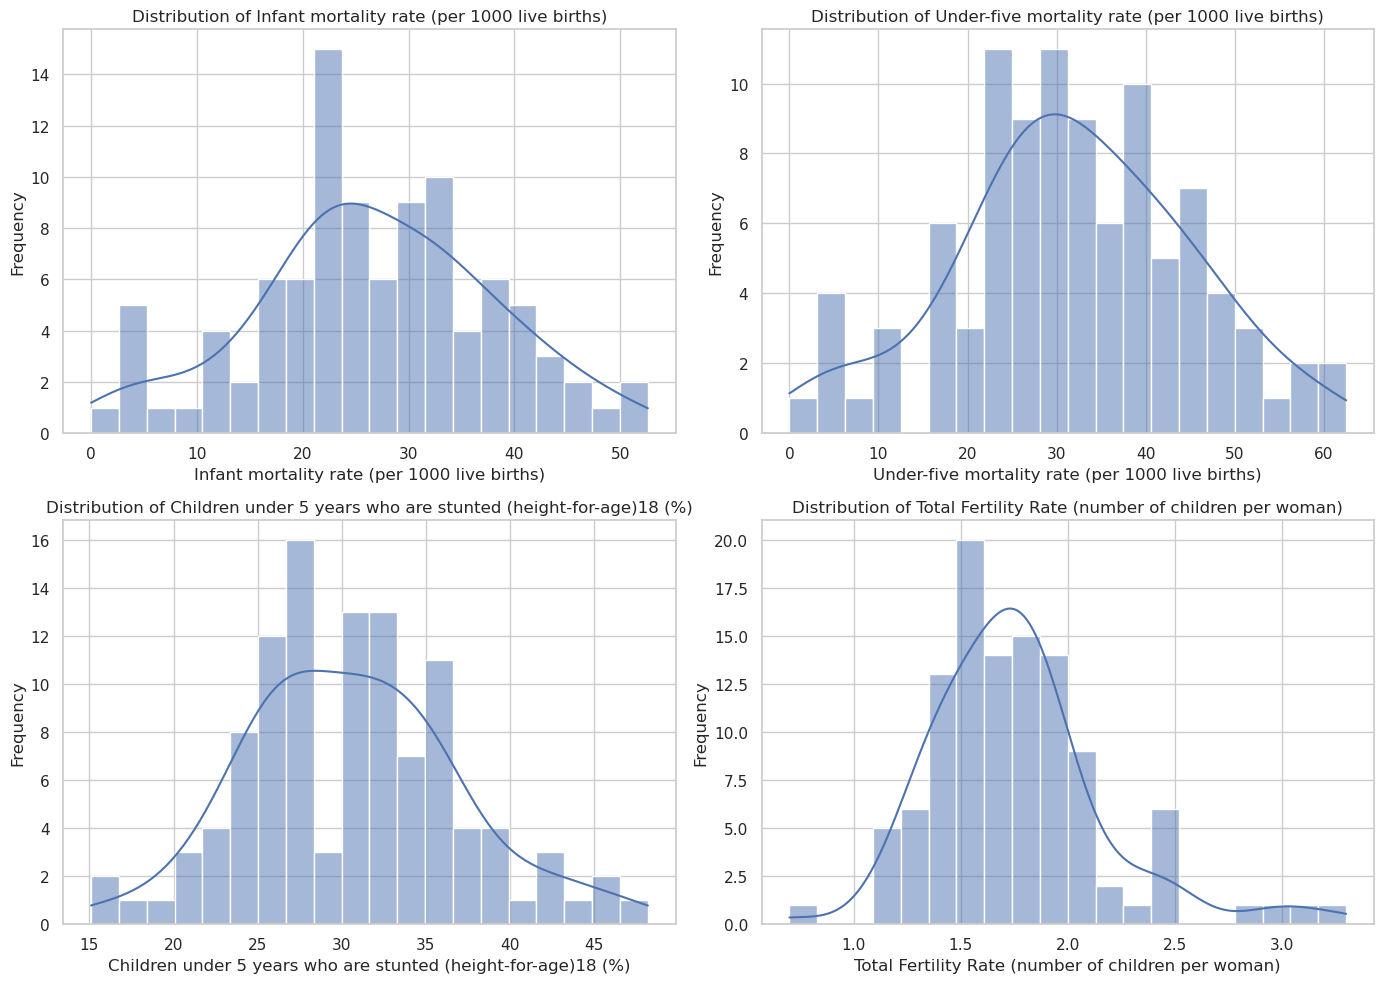

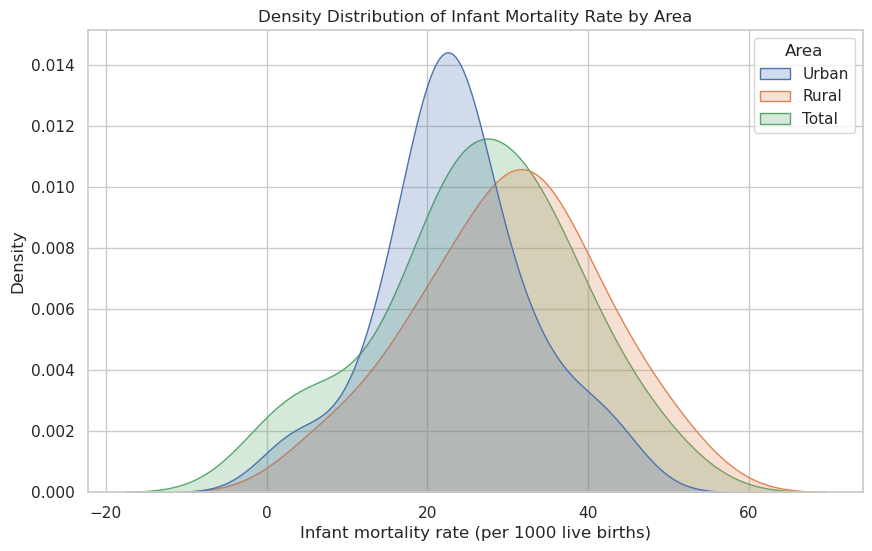

In [5]:
# Cell 5: Distributions of key indicators
# Histograms for distributions

plt.figure(figsize=(14, 10))
for i, col in enumerate(key_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Creative visualization: KDE by Area (Urban/Rural/Total)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Infant mortality rate (per 1000 live births)', hue='Area', fill=True)
plt.title('Density Distribution of Infant Mortality Rate by Area')
plt.show()

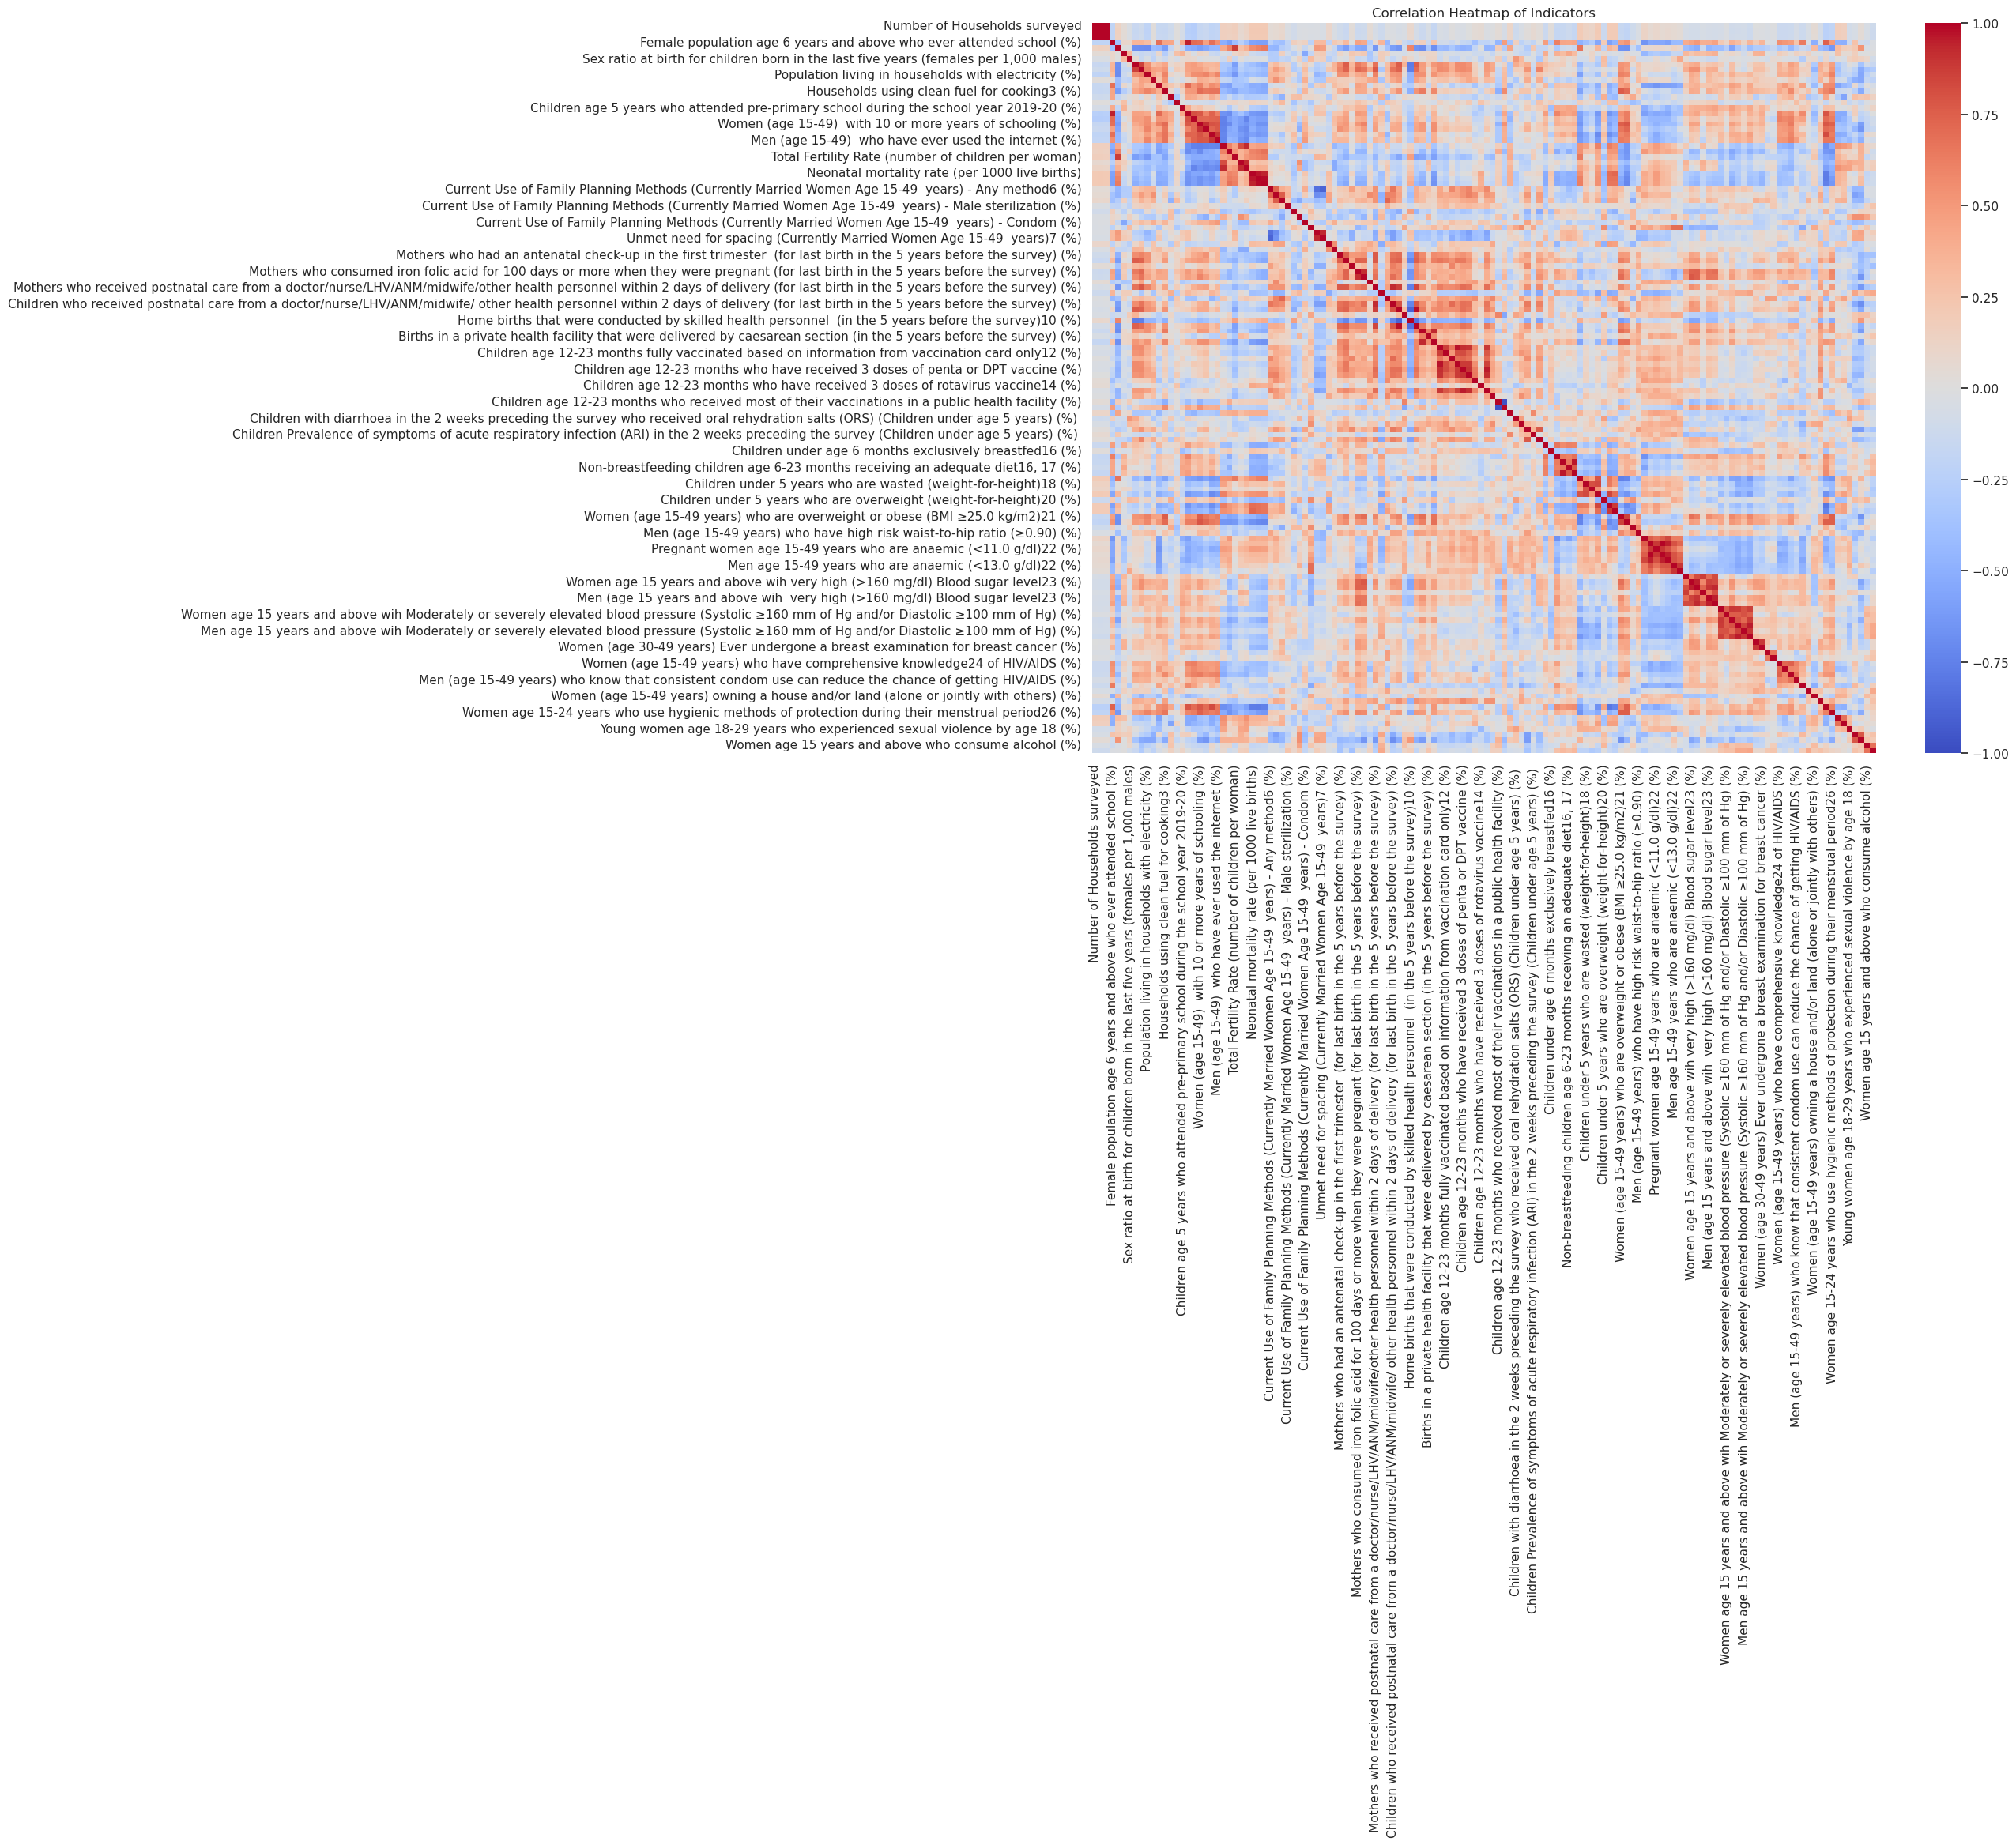

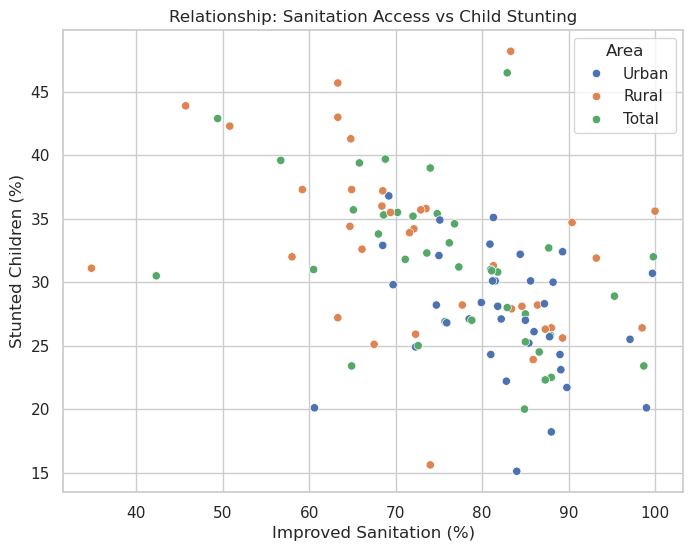

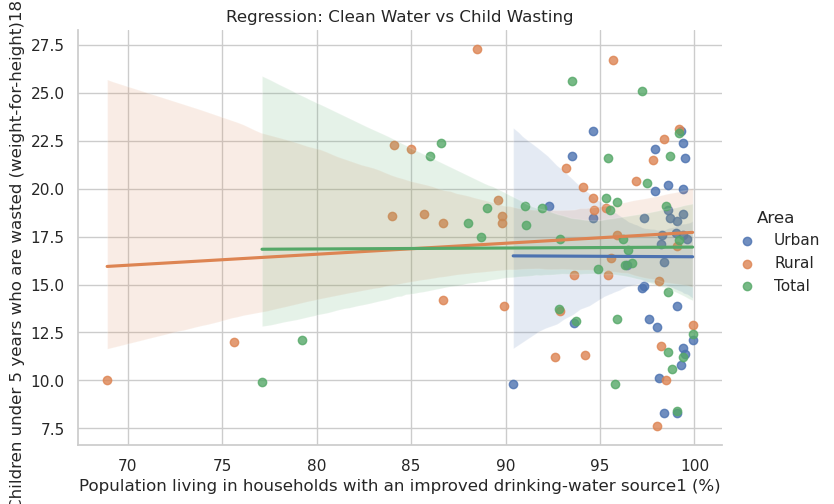

In [6]:
# Cell 6: Relationships - Correlations
# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap for correlations (creative: focus on high correlations)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Indicators')
plt.show()

# Example: Strong relationships - Scatter plot between stunting and access to sanitation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Population living in households that use an improved sanitation facility2 (%)', 
                y='Children under 5 years who are stunted (height-for-age)18 (%)', 
                hue='Area', data=df)
plt.title('Relationship: Sanitation Access vs Child Stunting')
plt.xlabel('Improved Sanitation (%)')
plt.ylabel('Stunted Children (%)')
plt.show()

# Regression plot for deeper insight
sns.lmplot(x='Population living in households with an improved drinking-water source1 (%)', 
           y='Children under 5 years who are wasted (weight-for-height)18 (%)', 
           hue='Area', data=df, aspect=1.5)
plt.title('Regression: Clean Water vs Child Wasting')
plt.show()

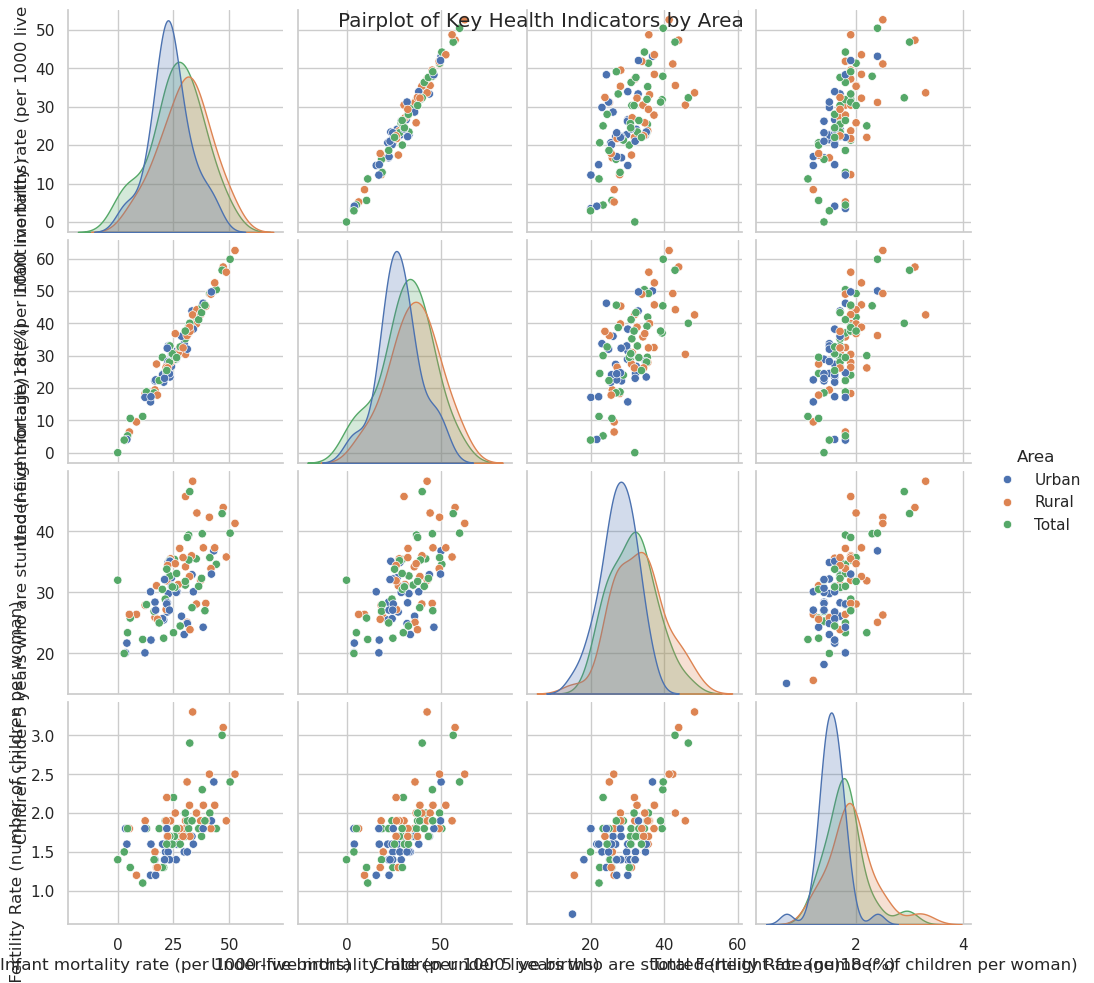

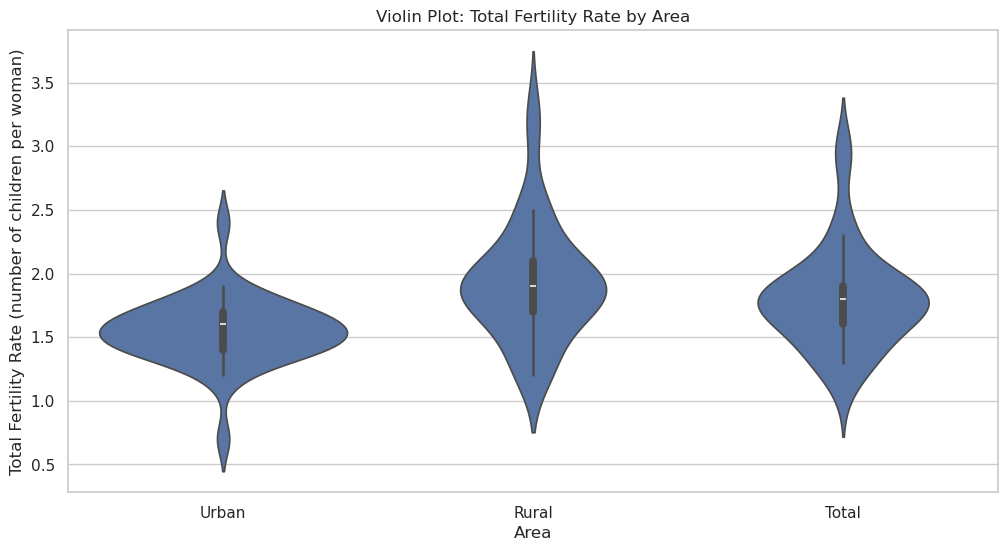

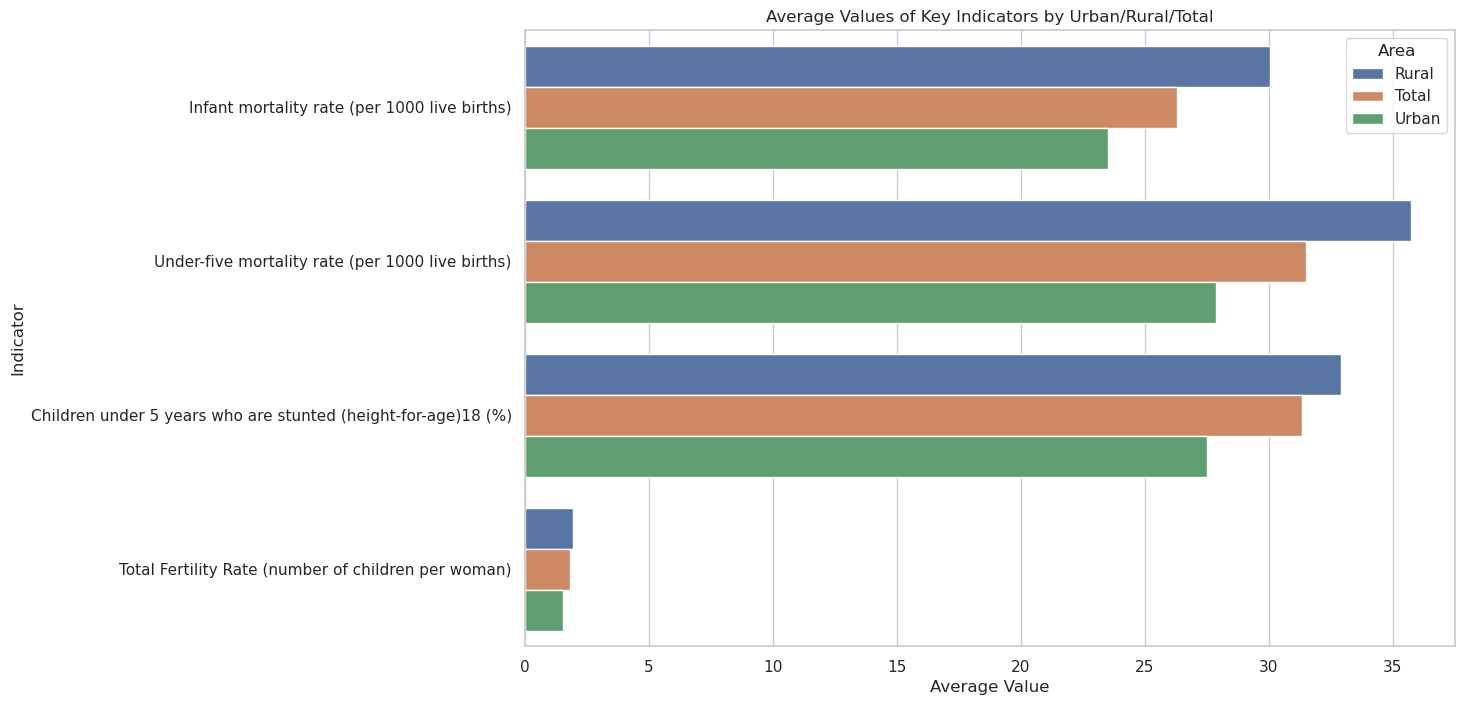

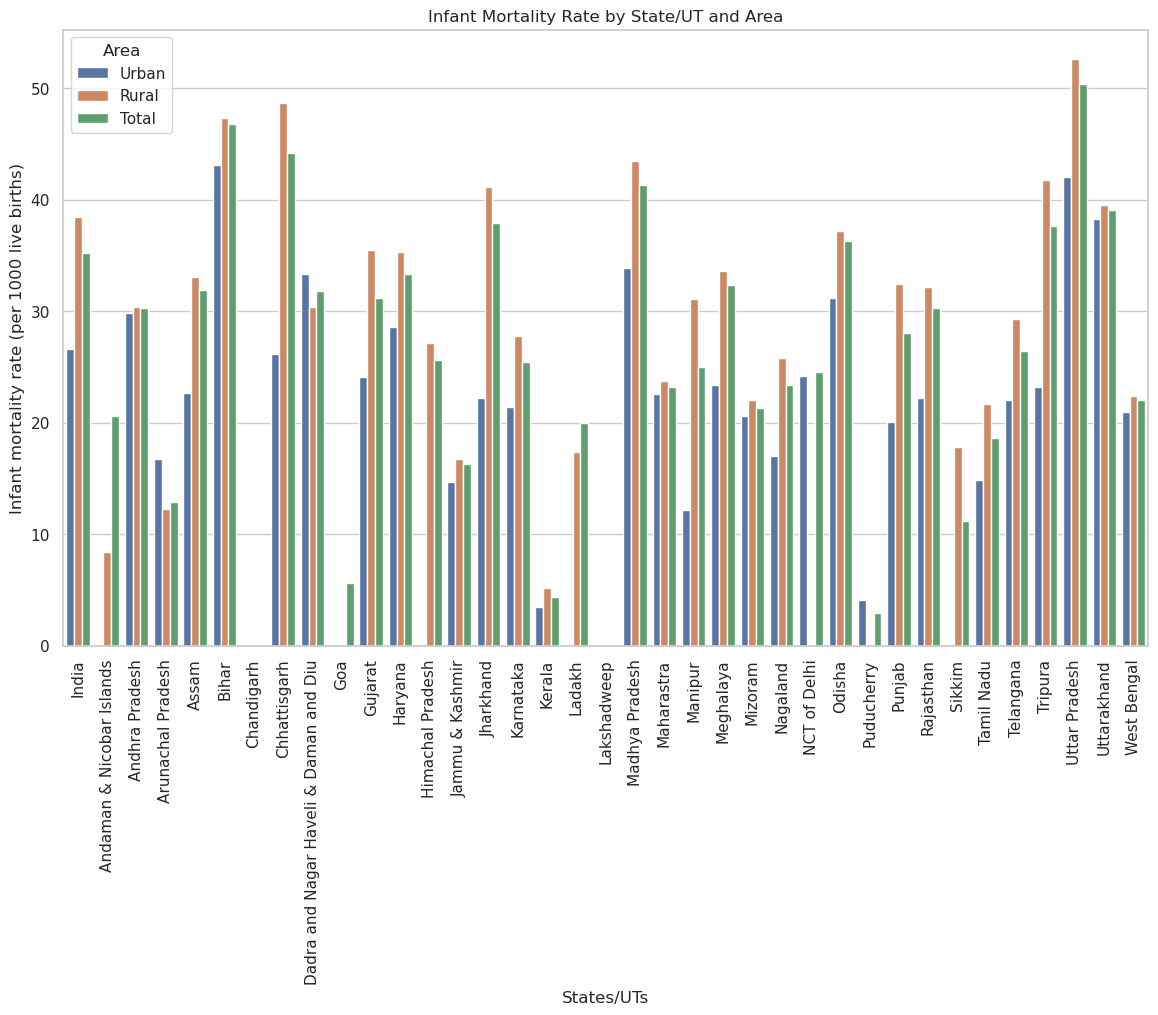

In [7]:
# Cell 7: Creative Visualizations
# Pairplot for multiple relationships
sns.pairplot(df[key_cols + ['Area']], hue='Area', diag_kind='kde')
plt.suptitle('Pairplot of Key Health Indicators by Area')
plt.show()

# Violin plots for distribution across states (group by Area)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Area', y='Total Fertility Rate (number of children per woman)', data=df)
plt.title('Violin Plot: Total Fertility Rate by Area')
plt.show()

# Bar plot: Average indicators by Area
avg_by_area = df.groupby('Area')[key_cols].mean().reset_index()
avg_by_area_melt = avg_by_area.melt(id_vars='Area', var_name='Indicator', value_name='Average Value')

plt.figure(figsize=(12, 8))
sns.barplot(x='Average Value', y='Indicator', hue='Area', data=avg_by_area_melt)
plt.title('Average Values of Key Indicators by Urban/Rural/Total')
plt.show()

# Geospatial mock (since no lat/long, group by States/UTs - example bar for IMR)
plt.figure(figsize=(14, 8))
sns.barplot(x='States/UTs', y='Infant mortality rate (per 1000 live births)', hue='Area', data=df)
plt.xticks(rotation=90)
plt.title('Infant Mortality Rate by State/UT and Area')
plt.show()

In [8]:
# Cell 8: Further Cleaning if Needed - Impute Missing Values
# Example: Fill missing with median (for exploration, not always recommended)
df_imputed = df.copy()
for col in numeric_df.columns:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

# Check missing after imputation
print("Missing After Imputation:\n", df_imputed.isnull().sum())

# Save cleaned dataset
df_imputed.to_csv('cleaned_nfhs_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_nfhs_data.csv'")

Missing After Imputation:
 States/UTs                                                                   0
Area                                                                         0
Number of Households surveyed                                                0
Number of Women age 15-49 years interviewed                                  0
Number of Men age 15-54 years interviewed                                    0
                                                                            ..
Young women age 18-29 years who experienced sexual violence by age 18 (%)    0
Women age 15 years and above who use any kind of tobacco (%)                 0
Men age 15 years and above who use any kind of tobacco (%)                   0
Women age 15 years and above who consume alcohol (%)                         0
Men age 15 years and above who consume alcohol (%)                           0
Length: 136, dtype: int64
Cleaned dataset saved as 'cleaned_nfhs_data.csv'


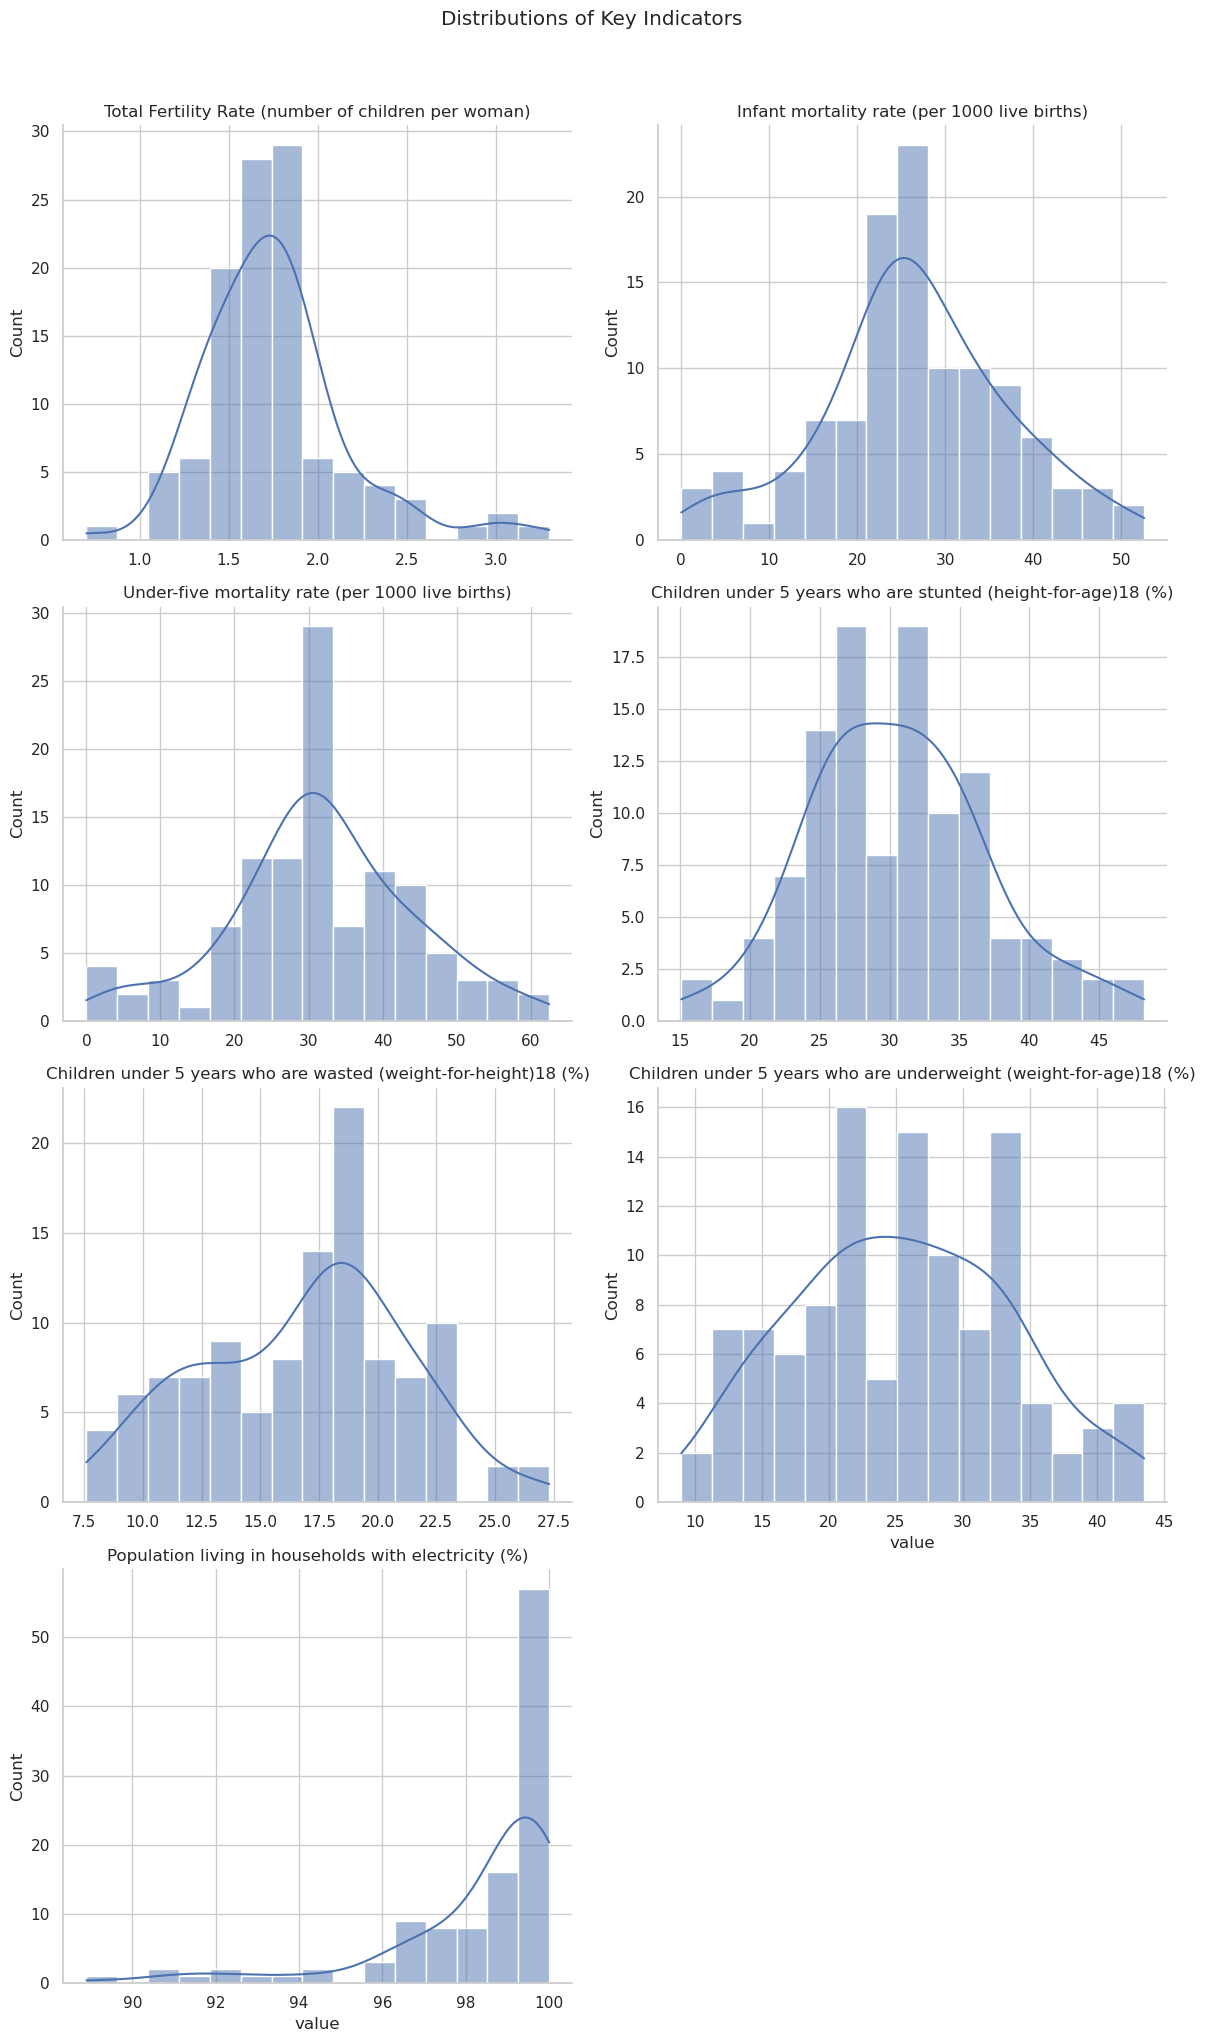

In [9]:
# Cell 9: Enhanced Distributions - FacetGrid for Key Indicators by Area
import seaborn as sns
import matplotlib.pyplot as plt

# Reload data if needed (assuming cleaned_nfhs_data.csv from previous)
df = pd.read_csv('cleaned_nfhs_data.csv')

# First, let's check the actual column names in the DataFrame
# Uncomment the next line to see all columns
# print(df.columns.tolist())

# Modify key_indicators to match the actual column names in your DataFrame
# You may need to adjust these based on your actual column names
key_indicators = [
    'Total Fertility Rate (number of children per woman)',
    'Infant mortality rate (per 1000 live births)',
    'Under-five mortality rate (per 1000 live births)',
    'Children under 5 years who are stunted (height-for-age)18 (%)',
    'Children under 5 years who are wasted (weight-for-height)18 (%)',
    'Children under 5 years who are underweight (weight-for-age)18 (%)'
    # Removed or need to be corrected:
    # 'Women (age 15-49 years) who are literate4 (%)',
    # 'Men (age 15-49 years) who are literate4 (%)',
    # 'Population living in households with an improved sanitation facility2 (%)',
]

# Add columns that exist in your DataFrame
# For example, if these columns exist with slightly different names:
# key_indicators.append('Women (age 15-49) who are literate (%)')
# key_indicators.append('Men (age 15-49) who are literate (%)')
# key_indicators.append('Population with improved sanitation (%)')

# Make sure 'Population living in households with electricity (%)' exists
if 'Population living in households with electricity (%)' in df.columns:
    key_indicators.append('Population living in households with electricity (%)')

# FacetGrid for distributions by Area
g = sns.FacetGrid(df.melt(id_vars='Area', value_vars=key_indicators), 
                 col='variable', col_wrap=2, height=5, aspect=1.2, 
                 sharex=False, sharey=False)
g.map(sns.histplot, 'value', kde=True, bins=15)
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Distributions of Key Indicators', y=1.02)
plt.tight_layout()
plt.show()

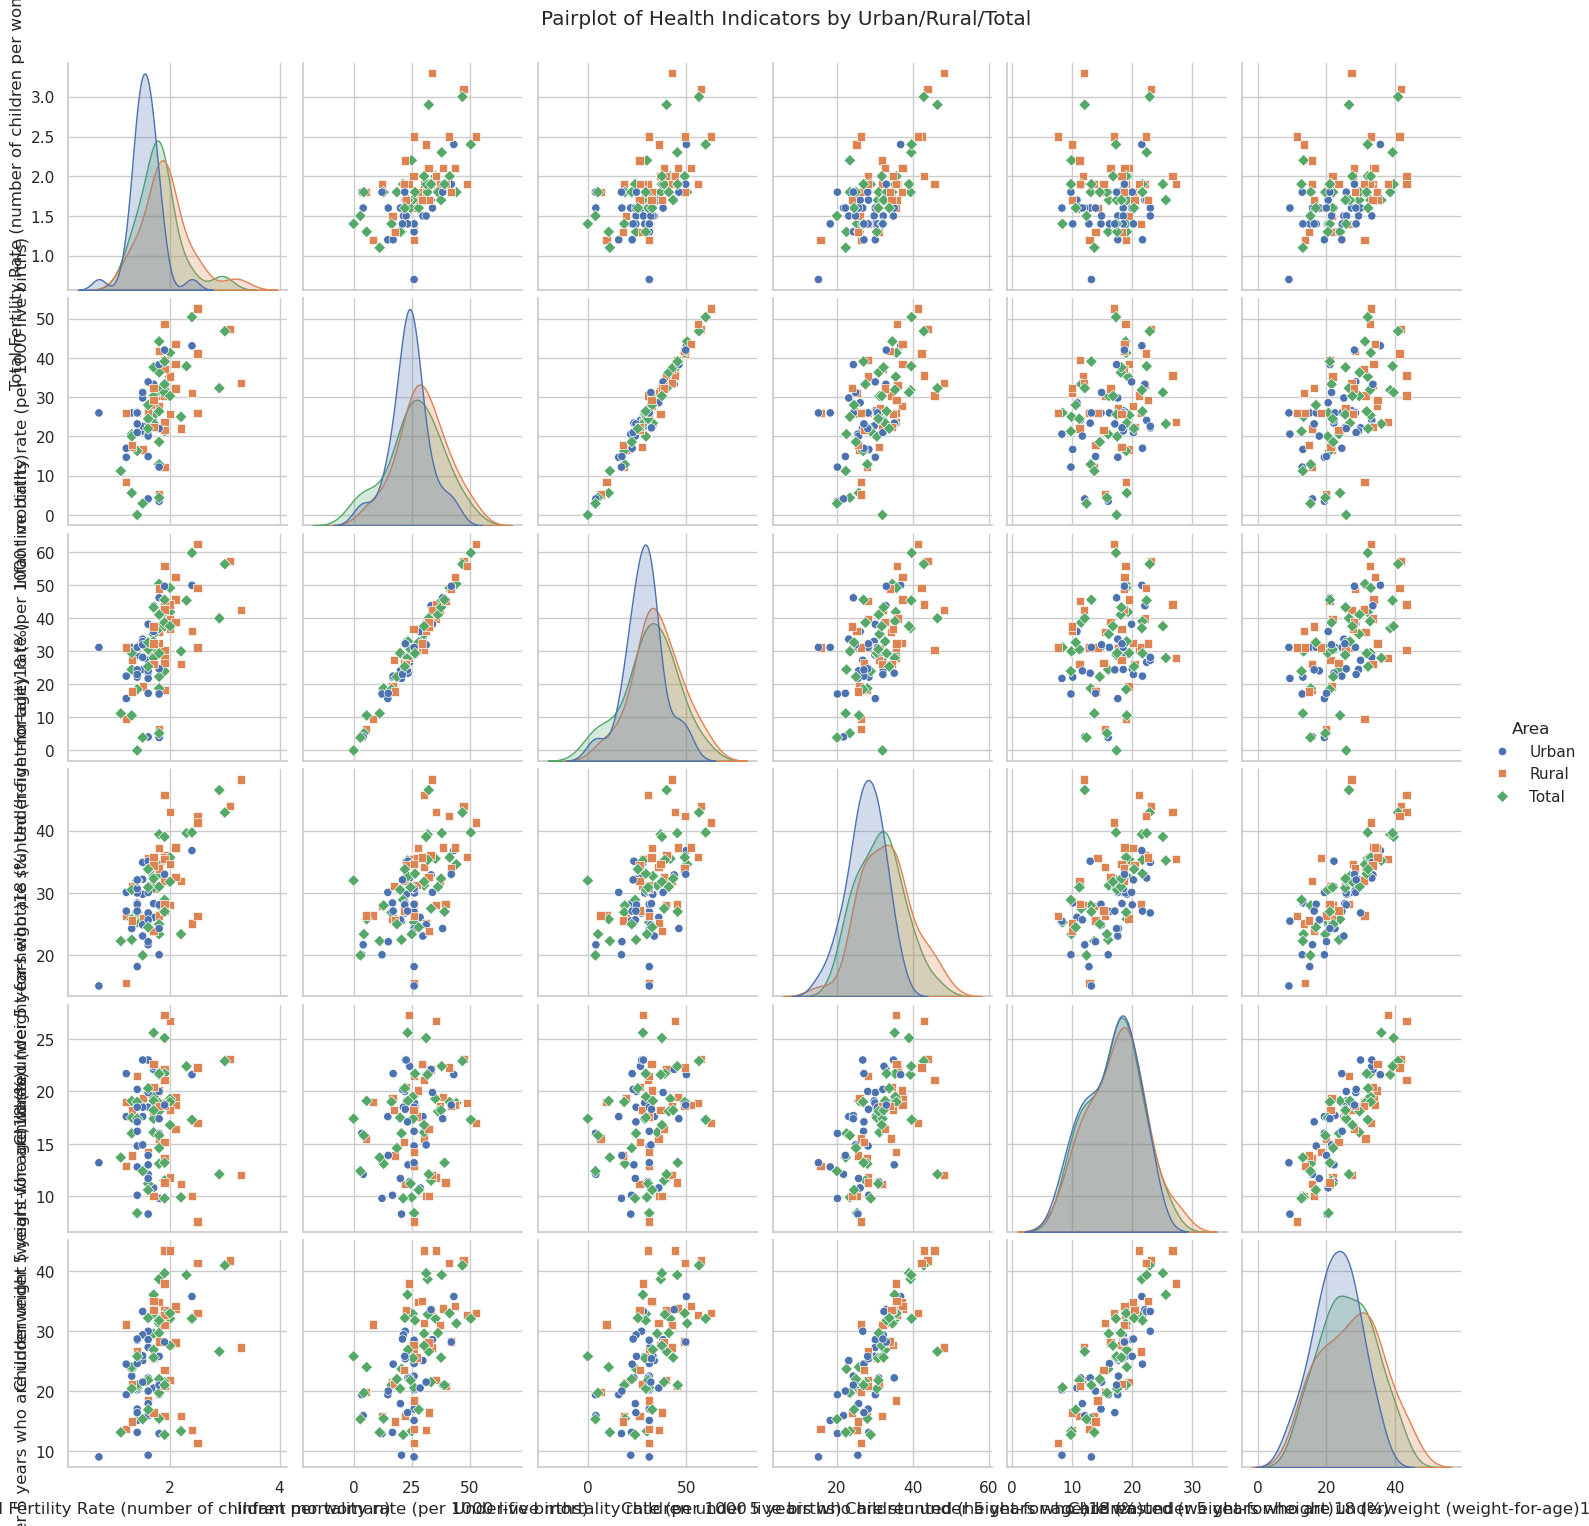

In [10]:
# Cell 10: Creative Visualization - Pairplot with Hue for Area
sns.pairplot(df[key_indicators[:6] + ['Area']], hue='Area', diag_kind='kde', markers=['o', 's', 'D'])
plt.suptitle('Pairplot of Health Indicators by Urban/Rural/Total', y=1.02)
plt.show()

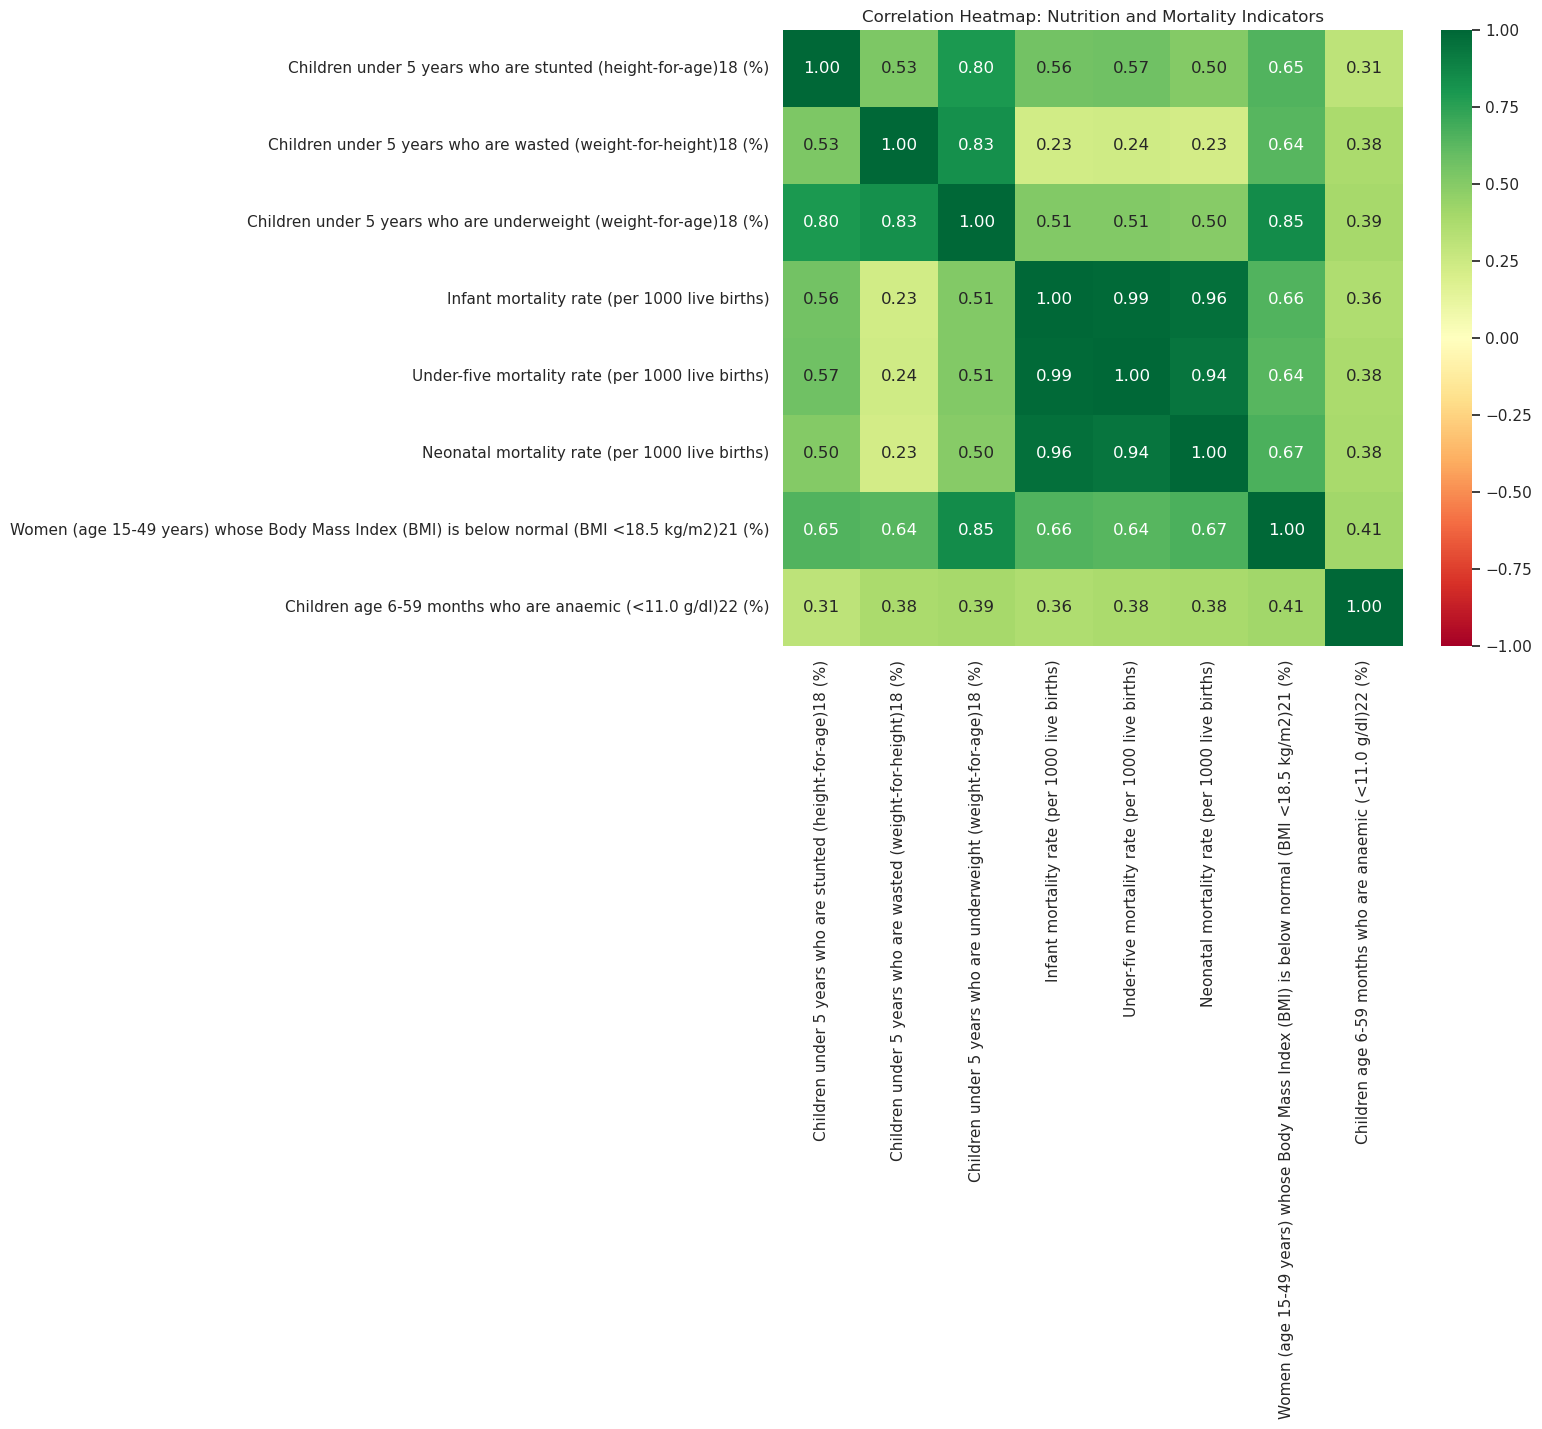

In [11]:
# Cell 11: Relationships - Correlation Heatmap Focused on Nutrition and Mortality
nutrition_mortality_cols = [
    'Children under 5 years who are stunted (height-for-age)18 (%)',
    'Children under 5 years who are wasted (weight-for-height)18 (%)',
    'Children under 5 years who are underweight (weight-for-age)18 (%)',
    'Infant mortality rate (per 1000 live births)',
    'Under-five mortality rate (per 1000 live births)',
    'Neonatal mortality rate (per 1000 live births)',
    'Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)',
    'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)'
]

corr_nut_mort = df[nutrition_mortality_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_nut_mort, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap: Nutrition and Mortality Indicators')
plt.show()

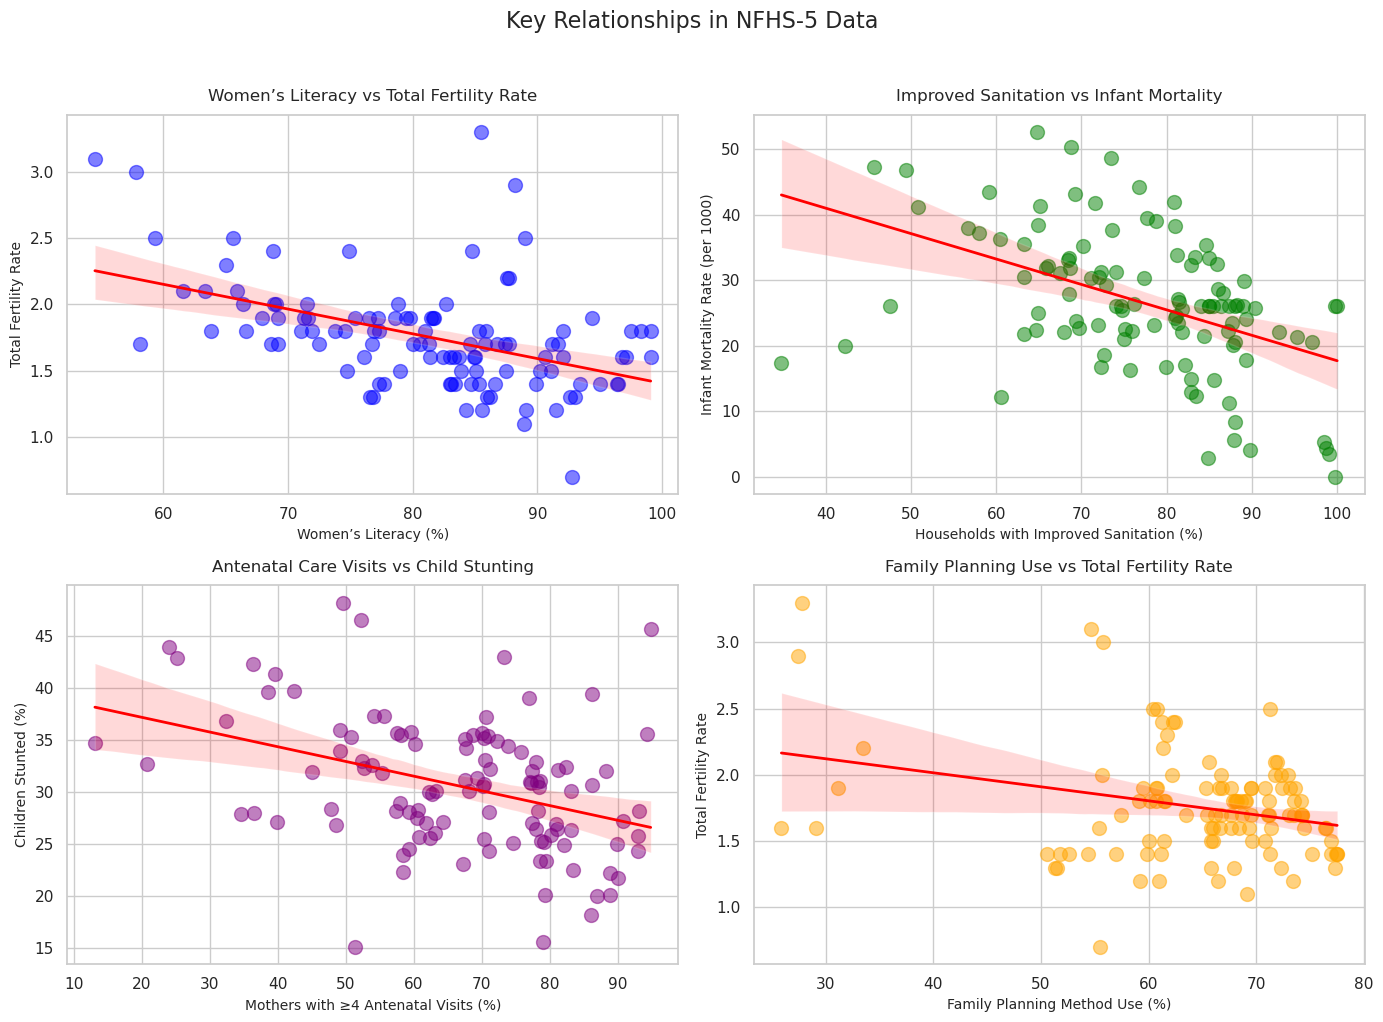

Scatter plots with regression lines saved as 'scatter_regression_plots.png'


In [12]:
# Cell 12: Scatter Plots with Regression Lines for Key Relationships (Corrected)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset (assuming saved from previous steps)
df = pd.read_csv('cleaned_nfhs_data.csv')

# Define the correct column names from the dataset
literacy_col = 'Women (age 15-49) who are literate4 (%)'
fertility_col = 'Total Fertility Rate (number of children per woman)'
sanitation_col = 'Population living in households that use an improved sanitation facility2 (%)'
infant_mortality_col = 'Infant mortality rate (per 1000 live births)'
antenatal_col = 'Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)'
stunting_col = 'Children under 5 years who are stunted (height-for-age)18 (%)'
family_planning_col = 'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any method6 (%)'

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot with regression line for Literacy vs Fertility Rate
sns.regplot(
    ax=axes[0, 0],
    data=df,
    x=literacy_col,
    y=fertility_col,
    scatter_kws={'alpha': 0.5, 's': 100, 'color': 'blue'},
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[0, 0].set_title('Women’s Literacy vs Total Fertility Rate', fontsize=12, pad=10)
axes[0, 0].set_xlabel('Women’s Literacy (%)', fontsize=10)
axes[0, 0].set_ylabel('Total Fertility Rate', fontsize=10)

# Scatter plot with regression line for Sanitation vs Infant Mortality
sns.regplot(
    ax=axes[0, 1],
    data=df,
    x=sanitation_col,
    y=infant_mortality_col,
    scatter_kws={'alpha': 0.5, 's': 100, 'color': 'green'},
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[0, 1].set_title('Improved Sanitation vs Infant Mortality', fontsize=12, pad=10)
axes[0, 1].set_xlabel('Households with Improved Sanitation (%)', fontsize=10)
axes[0, 1].set_ylabel('Infant Mortality Rate (per 1000)', fontsize=10)

# Scatter plot with regression line for Antenatal Care vs Stunting
sns.regplot(
    ax=axes[1, 0],
    data=df,
    x=antenatal_col,
    y=stunting_col,
    scatter_kws={'alpha': 0.5, 's': 100, 'color': 'purple'},
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[1, 0].set_title('Antenatal Care Visits vs Child Stunting', fontsize=12, pad=10)
axes[1, 0].set_xlabel('Mothers with ≥4 Antenatal Visits (%)', fontsize=10)
axes[1, 0].set_ylabel('Children Stunted (%)', fontsize=10)

# Scatter plot with regression line for Family Planning vs Fertility Rate
sns.regplot(
    ax=axes[1, 1],
    data=df,
    x=family_planning_col,
    y=fertility_col,
    scatter_kws={'alpha': 0.5, 's': 100, 'color': 'orange'},
    line_kws={'color': 'red', 'linewidth': 2}
)
axes[1, 1].set_title('Family Planning Use vs Total Fertility Rate', fontsize=12, pad=10)
axes[1, 1].set_xlabel('Family Planning Method Use (%)', fontsize=10)
axes[1, 1].set_ylabel('Total Fertility Rate', fontsize=10)

# Adjust layout and add a super title
plt.suptitle('Key Relationships in NFHS-5 Data', fontsize=16, y=1.02)
plt.tight_layout()

# Save the plot
plt.savefig('scatter_regression_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Scatter plots with regression lines saved as 'scatter_regression_plots.png'")

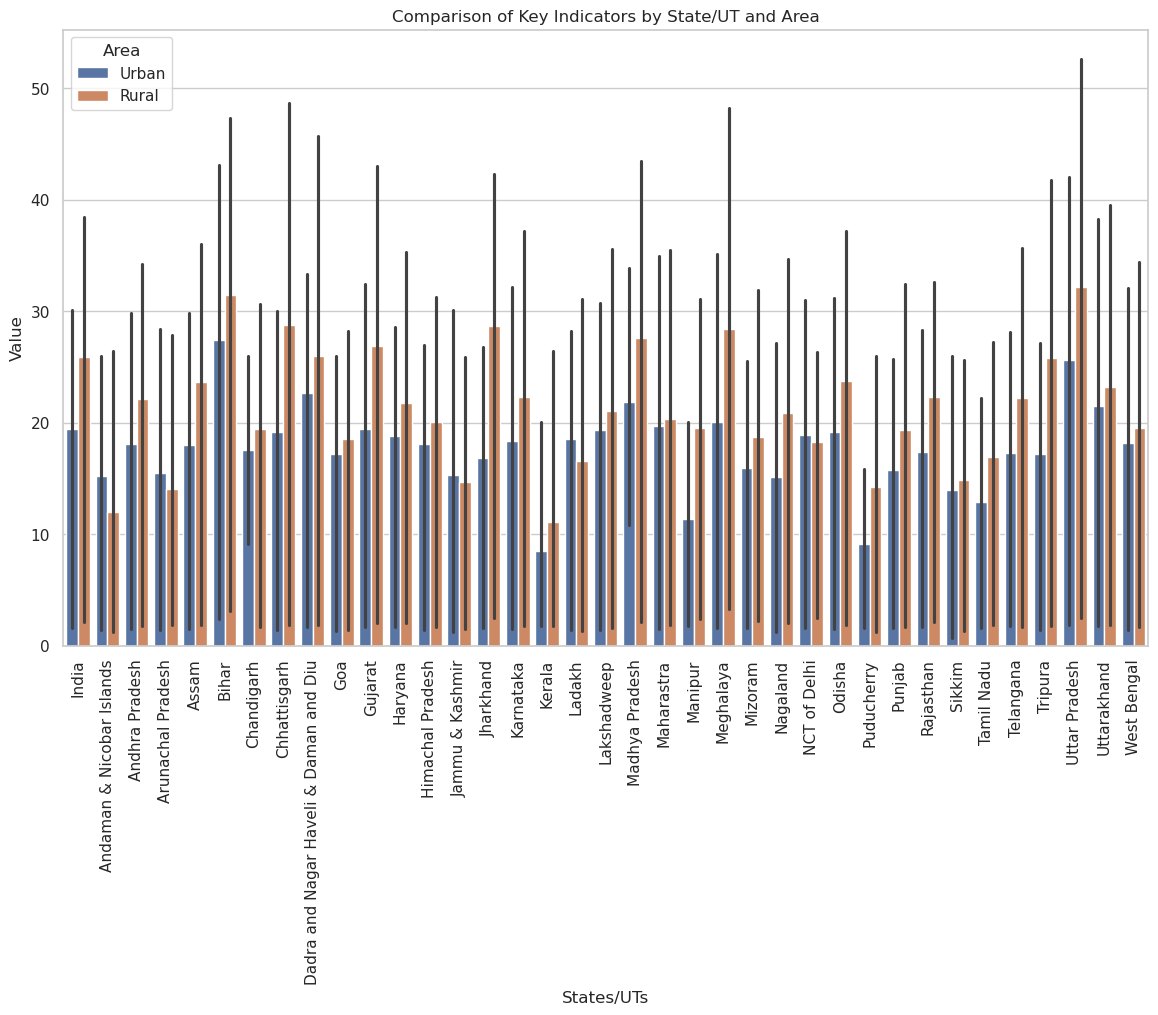

In [13]:
# Cell 13: Bar Plots Comparing Urban vs Rural Across States
# Melt data for easier plotting
comparison_cols = ['Infant mortality rate (per 1000 live births)', 'Children under 5 years who are stunted (height-for-age)18 (%)', 'Total Fertility Rate (number of children per woman)']
df_melt = df[df['Area'] != 'Total'].melt(id_vars=['States/UTs', 'Area'], value_vars=comparison_cols)

plt.figure(figsize=(14, 8))
sns.barplot(x='States/UTs', y='value', hue='Area', data=df_melt)
plt.xticks(rotation=90)
plt.title('Comparison of Key Indicators by State/UT and Area')
plt.ylabel('Value')
plt.legend(title='Area')
plt.show()

In [14]:
import plotly.express as px
for col in key_indicators:
    fig = px.violin(df, x='Area', y=col, color='Area', title=f'Violin Plot: {col}')
    fig.show()

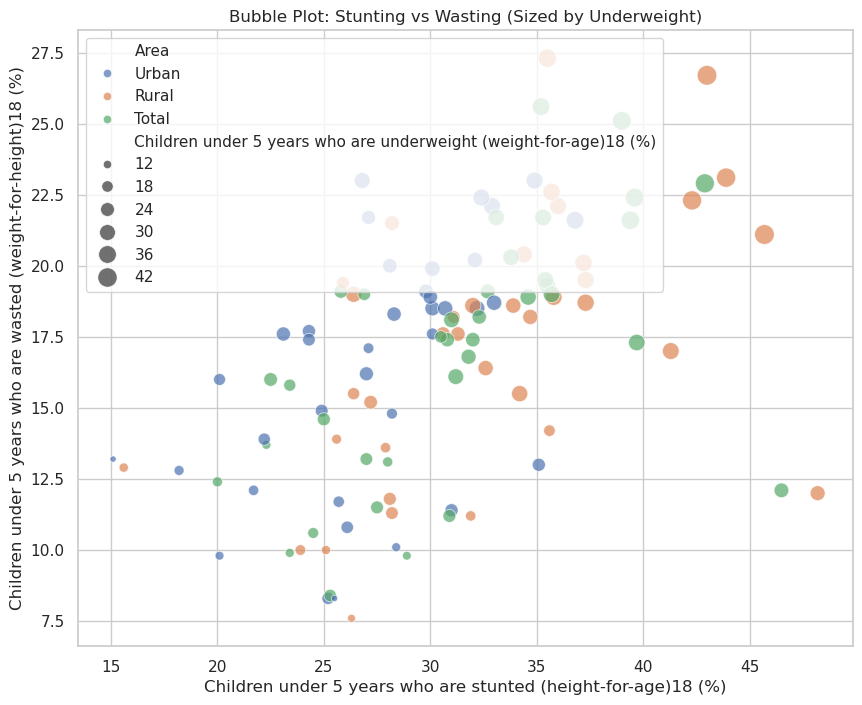

In [15]:
# Cell 15: Creative: Bubble Plot for Multi-Variable Relationship
# Example: Stunting vs Wasting, sized by Underweight, colored by Area
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=df, 
    x='Children under 5 years who are stunted (height-for-age)18 (%)', 
    y='Children under 5 years who are wasted (weight-for-height)18 (%)', 
    size='Children under 5 years who are underweight (weight-for-age)18 (%)', 
    hue='Area', 
    sizes=(20, 200), 
    alpha=0.7
)
plt.title('Bubble Plot: Stunting vs Wasting (Sized by Underweight)')
plt.show()

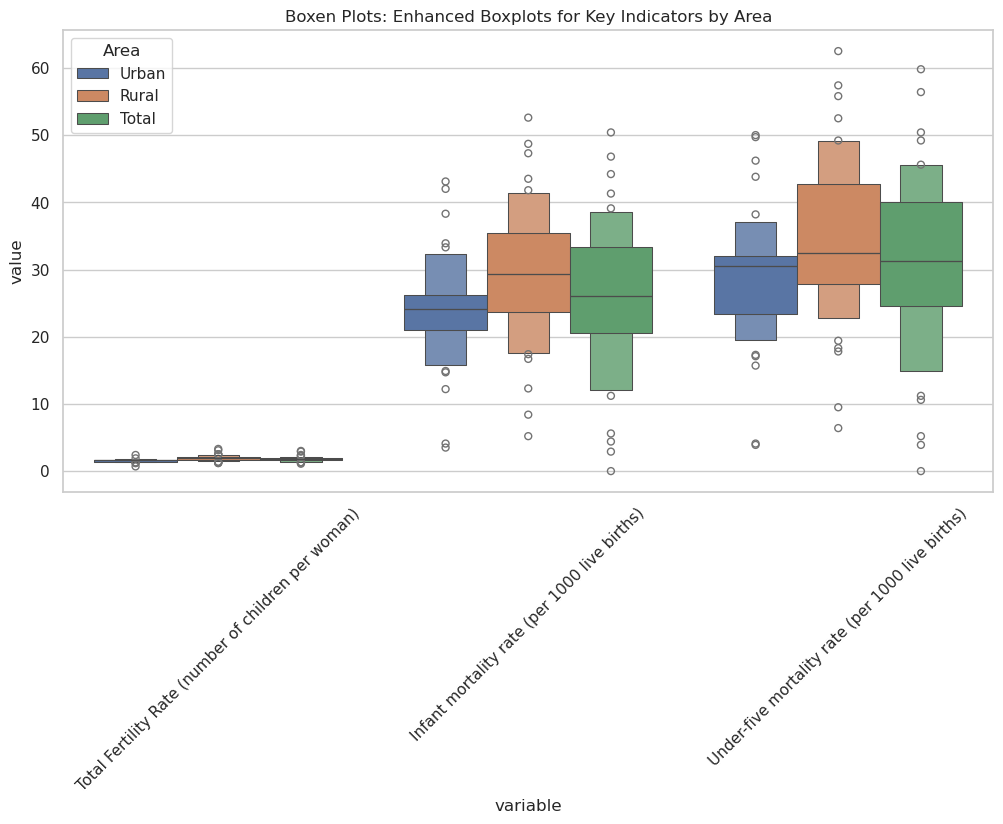

<Figure size 640x480 with 0 Axes>

In [16]:
# Cell 16: Boxen Plots for Outlier-Resistant Distributions
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df.melt(id_vars='Area', value_vars=key_indicators[:3]), x='variable', y='value', hue='Area')
plt.title('Boxen Plots: Enhanced Boxplots for Key Indicators by Area')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Boxen Plots: Enhanced Boxplots for Key Indicators by Area')

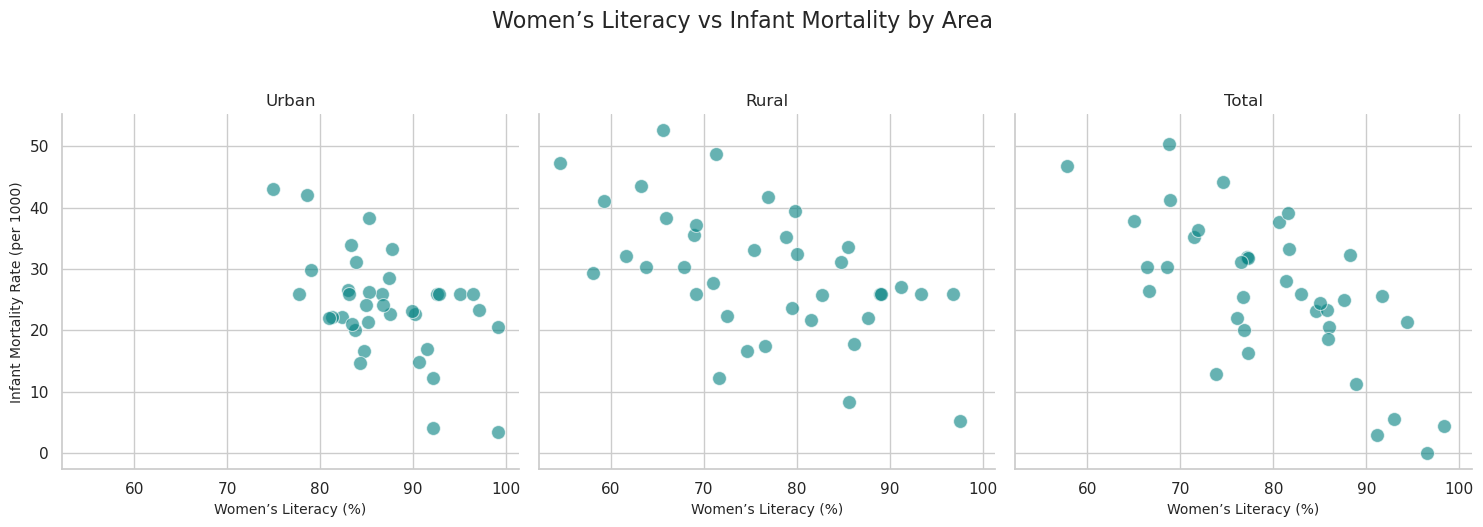

FacetGrid scatter plot saved as 'facetgrid_literacy_vs_infant_mortality.png'


In [17]:
# Define exact column names from the NFHS-5 dataset
literacy_col = 'Women (age 15-49) who are literate4 (%)'
infant_mortality_col = 'Infant mortality rate (per 1000 live births)'

# Create FacetGrid for scatter plots by Area
g = sns.FacetGrid(df, col='Area', height=5, aspect=1, col_order=['Urban', 'Rural', 'Total'])
g.map(
    sns.scatterplot, 
    literacy_col, 
    infant_mortality_col, 
    s=100, 
    alpha=0.6, 
    color='teal'
)
g.set_titles(col_template="{col_name}", size=12)
g.set_axis_labels('Women’s Literacy (%)', 'Infant Mortality Rate (per 1000)', fontsize=10)
g.fig.suptitle('Women’s Literacy vs Infant Mortality by Area', fontsize=16, y=1.05)

# Adjust layout
g.tight_layout()

# Save the plot
plt.savefig('facetgrid_literacy_vs_infant_mortality.png', dpi=300, bbox_inches='tight')
plt.show()

print("FacetGrid scatter plot saved as 'facetgrid_literacy_vs_infant_mortality.png'")

In [18]:
# Cell 18: Save All Plots to Files for Review
# If you want to save instead of showing
plt.savefig('distribution_facetgrid.png')  # For Cell 9 plot, add after plt.show() in each cell
# Repeat for others: e.g., plt.savefig('pairplot.png'), etc.
print("Plots saved as PNG files.")

Plots saved as PNG files.


<Figure size 640x480 with 0 Axes>